<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datos-de-estudio" data-toc-modified-id="Datos-de-estudio-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datos de estudio</a></span></li><li><span><a href="#Mínimos-cuadrados-&quot;a-mano&quot;" data-toc-modified-id="Mínimos-cuadrados-&quot;a-mano&quot;-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mínimos cuadrados "a mano"</a></span><ul class="toc-item"><li><span><a href="#Coeficientes" data-toc-modified-id="Coeficientes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Coeficientes</a></span></li><li><span><a href="#Predicciones" data-toc-modified-id="Predicciones-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Predicciones</a></span></li><li><span><a href="#Coeficientes-de-determinación" data-toc-modified-id="Coeficientes-de-determinación-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Coeficientes de determinación</a></span></li></ul></li><li><span><a href="#Mínimos-cuadrados-con-scikit-learn" data-toc-modified-id="Mínimos-cuadrados-con-scikit-learn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mínimos cuadrados con scikit-learn</a></span><ul class="toc-item"><li><span><a href="#Coeficientes" data-toc-modified-id="Coeficientes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Coeficientes</a></span></li><li><span><a href="#Predicciones" data-toc-modified-id="Predicciones-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Predicciones</a></span></li><li><span><a href="#Coeficientes-de-determinación" data-toc-modified-id="Coeficientes-de-determinación-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Coeficientes de determinación</a></span></li></ul></li><li><span><a href="#Visualización-de-predicciones" data-toc-modified-id="Visualización-de-predicciones-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualización de predicciones</a></span></li><li><span><a href="#Regresión-lineal-con-Stochastic-Gradient-Descent" data-toc-modified-id="Regresión-lineal-con-Stochastic-Gradient-Descent-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Regresión lineal con Stochastic Gradient Descent</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

# Datos de estudio

In [2]:
X = np.array([32, 25, 25, 22, 24, 35, 40, 30, 28, 25])
y = np.array([27, 42, 40, 50, 45, 30, 25, 25, 30, 40])

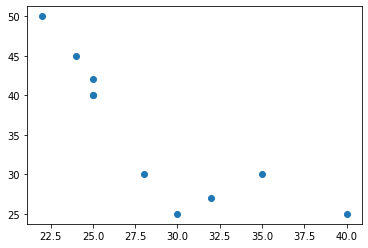

In [3]:
# Nube de puntos
plt.scatter(X, y)

# Mínimos cuadrados "a mano"

## Coeficientes

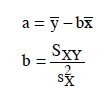

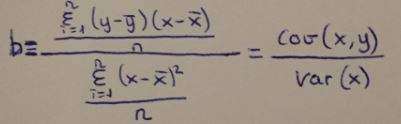

In [4]:
# Coeficiente de regresión (b)
b = sum((y-np.mean(y))*(X-np.mean(X)))/sum((X-np.mean(X))**2)
b

-1.3536754507628292

In [5]:
# Ordenada en el origen (a)
a = np.mean(y) - b*np.mean(X)
a

74.11511789181691

## Predicciones

In [12]:
# Predicciones
# y*=a+b*X 
y_pred = a + b * X
y_pred

array([30.79750347, 40.27323162, 40.27323162, 44.33425798, 41.62690707,
       26.73647712, 19.96809986, 33.50485437, 36.21220527, 40.27323162])

In [14]:
y

array([27, 42, 40, 50, 45, 30, 25, 25, 30, 40])

## Coeficientes de determinación

In [16]:
# Sin ajustar
r2 = sum((y_pred - np.mean(y))**2)/sum((y - np.mean(y))**2)
r2

0.7176465181664967

In [18]:
n = len(X)
n

10

In [19]:
k = 1

In [20]:
# Ajustado
r2_adj = 1 - ((n-1)/(n-k-1))*(1-r2)
r2_adj

0.6823523329373088

# Mínimos cuadrados con scikit-learn

In [3]:
model = linear_model.LinearRegression()
model

LinearRegression()

In [25]:
X

array([32, 25, 25, 22, 24, 35, 40, 30, 28, 25])

In [10]:
X = X.reshape(-1, 1)
X

array([[32],
       [25],
       [25],
       [22],
       [24],
       [35],
       [40],
       [30],
       [28],
       [25]])

In [11]:
y = y.reshape(-1, 1)
y

array([[27],
       [42],
       [40],
       [50],
       [45],
       [30],
       [25],
       [25],
       [30],
       [40]])

In [6]:
results = model.fit(X,y)
results

LinearRegression()

## Coeficientes

In [29]:
# Coeficiente de regresión (b)
results.coef_

array([[-1.35367545]])

In [7]:
# Ordenada en el origen (a)
results.intercept_

array([74.11511789])

## Predicciones

In [9]:
# Predicciones
y_pred_sk = model.predict(X)
y_pred_sk

array([[30.79750347],
       [40.27323162],
       [40.27323162],
       [44.33425798],
       [41.62690707],
       [26.73647712],
       [19.96809986],
       [33.50485437],
       [36.21220527],
       [40.27323162]])

## Coeficientes de determinación

In [34]:
results.score(X, y)

0.717646518166497

In [35]:
results.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

# Visualización de predicciones

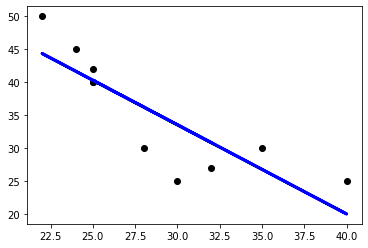

In [45]:
plt.scatter(X, y, color = "black")
plt.plot(X, y_pred, color = "blue", linewidth = 3)

In [51]:
X = X.flatten()
y = y.flatten()

In [53]:
y

array([27, 42, 40, 50, 45, 30, 25, 25, 30, 40])

In [54]:
comparison = pd.DataFrame({"Valor_real": y,
                          "Valor_calculado": y_pred})
comparison

,Valor_real,Valor_calculado
0,27,30.797503
1,42,40.273232
2,40,40.273232
3,50,44.334258
4,45,41.626907
5,30,26.736477
6,25,19.968100
7,25,33.504854
8,30,36.212205
9,40,40.273232


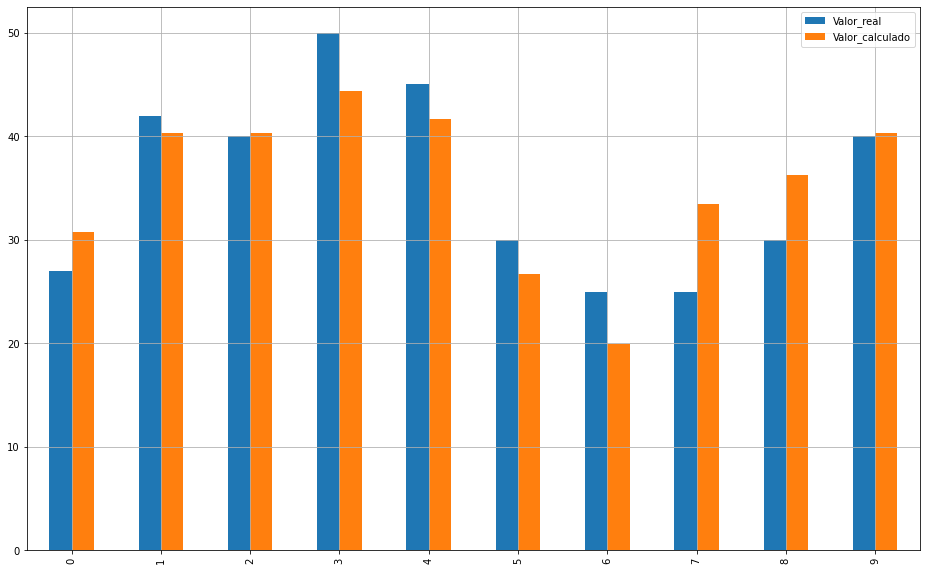

In [55]:
comparison.plot(kind = "bar", figsize=(16,10))
plt.grid(which="major")

In [10]:
residuals = y-y_pred_sk

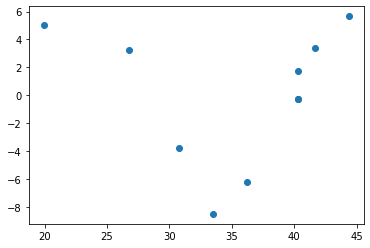

In [11]:
plt.scatter(y_pred_sk, residuals)

# Regresión lineal con Stochastic Gradient Descent

In [6]:
from sklearn.linear_model import SGDRegressor

In [7]:
# The ‘squared_loss’ refers to the ordinary least squares fit
sgd_regressor = SGDRegressor(loss='squared_loss', 
                             max_iter=1000, # epochs
                             shuffle=True, 
                             random_state=10, 
                             eta0=0.01)

In [12]:
sgd_results = sgd_regressor.fit(X,y)
sgd_results

C:\Users\albav\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor(random_state=10)

In [14]:
# Coeficiente de regresión (b)
sgd_results.coef_

array([-4.2120647e+10])

In [15]:
# Ordenada en el origen (a)
sgd_results.intercept_

array([6.00001309e+08])

In [16]:
sgd_results.score(X, y)

-2.038164129837882e+22